In [2]:
#Add Matplotlib inline magic command
%matplotlib inline

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
#Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
#outputs the first 10 row of the excel file 
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
#For the city_Data_df,
#we need to get all the rows that contain null values,  
#make sure the driver_count column has an integer data type
#find out how many data points there are for each type of city 
#Get the columns and the rows not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [16]:
#using df.count() to get the non null ones, this code shows there are 0 values in all 3 columns
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#We need to see if the driver_count column in excel has numerical data type we can perform math calculations
#get data types of each column
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [8]:
#We need to see how many data points there are for each type of city.
#we can use the unqiue() method which will return an array or list of all the unique values of that column
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Use the sum() method on the city_data_df for the type column where the condition equals each city in the DF; 
#the typhe column where the condition = Urban, Suburban, Rural to get the # of DP for Urban cities
sum(city_data_df["type"]=="Urban")


66

In [11]:
#Get the number of data points from Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [12]:
#Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [13]:
#Get the columns and the rows not null; When you run it youll see the # for each column
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [17]:
#to check that there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [18]:
#Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
#Merge DataFrames, review each DataFrames: city, driver_count, type vs city, data, fare, ride_id
#When we merge 2 DataFrames, we merge on a column with the same data, column name in both DataFrames
#Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Display the Data Frame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
#Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
#add the following code in a new cell and run the cell to create suburban_cities_df and the rural_cities_df
#Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] =="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] =="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [30]:
#Get the Number of Rides for Each City Type, we have to create a series where the index 
#is the name of the city and the column is the number of rides for that city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#To create a Data Series with 1 of the columns in a DF, we use the groupby() function and add the column
#apply the count() method to the Series for each city and select the ride_id column
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [32]:
#Create the suburban and rural ride count 
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#Next, we'll use the groupby() function on the city type #DataFrames to get the average fare for each city type 
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()
#We now have one of 3 datasets we need to create a bubblechart.



city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [33]:
#Get average fare for eachc ity in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [41]:
#Get average fare for each city in the suburban and rural cities 
suburban_avg_Fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()


city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [40]:
suburban_avg_Fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [42]:
#Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [43]:
#Let us repurpose our code and change the variables to calculate the average # of drivers for suburban
#and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [44]:
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [45]:
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

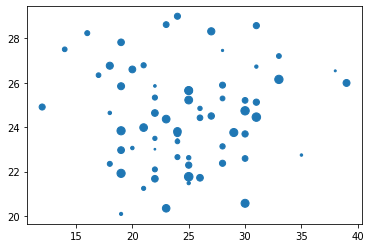

In [47]:
#Create a urban cities bubble chart using scatter plot and MATLAB method
# increase the size of the markers and add a label
plt.scatter(urban_ride_count, 
            urban_avg_fare, s=urban_driver_count) 
 

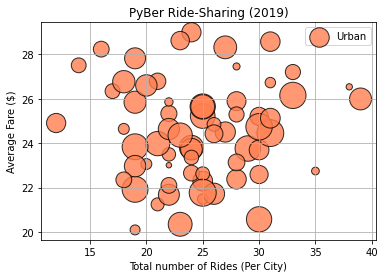

In [49]:
#Build the scatter plots for urban cities 
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", alpha = 0.8, label= "Urban", edgecolors="black")
plt.title("PyBer Ride-Sharing Data (2019)")

#1) The x-axis is the number of rides for each city
plt.xlabel("Total number of Rides (Per City)")
#2) The y-axis is the average fare for each city
plt.ylabel("Average Fare ($)")
#3) The size of each marker is the average number of drivers in each city
plt.grid(True)

#Legend
plt.legend()

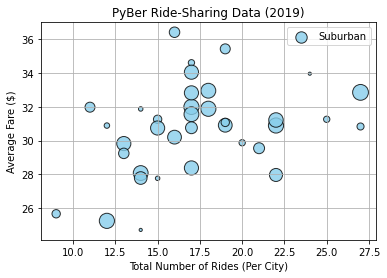

In [51]:
#Now Lets Create the SubUrban Cities Bubble Chart 
#Build the scatter plots for suburban cities 
plt.scatter(suburban_ride_count,
            suburban_avg_Fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

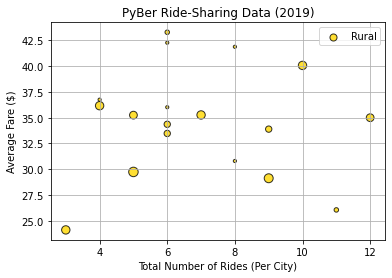

In [54]:
#Create the Rural Cities Bubble Chart - Start by building the scatter plots for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c='gold',
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a Legend
plt.legend()

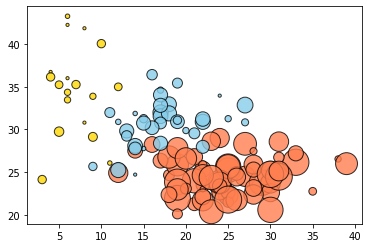

In [55]:
#Create a Bubble Chart for All Cities by combining our 3 scatter plot code blocks in one cell
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", alpha = 0.8, label= "Urban", edgecolors="black")
plt.scatter(suburban_ride_count,
            suburban_avg_Fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c='gold',
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

#Show the plot
plt.show()

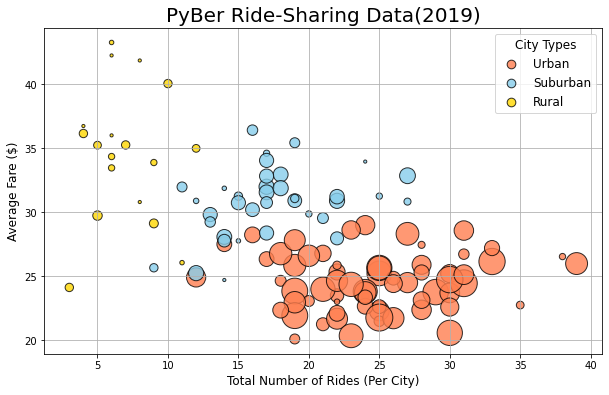

In [61]:
#Build the scatter charts for each city tupe 
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,
            suburban_avg_Fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")

#Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data(2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Add the legend
plt.legend()
# sets the font size of the marker in the legend to a fixed size with fontsize=, expanded legend horizontally with mode to fit the area
#added the # of scatter points in legend for each marker to be 1, we can add multiple points by increasing number
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")

#Set each marker in legend equal to 75-pt font by using attribute 
#and list indexing in brackets to reference one of 3 scatter plots
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75] 
lgnd.legendHandles[2]._sizes = [75]

#Increase font size of legend title
lgnd.get_title().set_fontsize(12)

#Show the plot
plt.show()



In [64]:
#We need to add a note to the right of the chart to let the viewer 
#know that the circle size correlates with the driver count for each city
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
#Save the figure
plt.savefig("Analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>